In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates

In [208]:
a = pd.read_csv("data/passengers2.csv")

In [3]:
a

,Month,reference,target,missing
0,1949-01-01,112,112.0,NaN
1,1949-02-01,118,118.0,NaN
2,1949-03-01,132,132.0,NaN
3,1949-04-01,129,NaN,129.0
4,1949-05-01,121,121.0,NaN
...,...,...,...,...
139,1960-08-01,606,606.0,NaN
140,1960-09-01,508,508.0,NaN
141,1960-10-01,461,461.0,NaN
142,1960-11-01,390,390.0,NaN


In [160]:
def f(x):
    if pd.isna(x.target):
        x.target = x.target2
    return x

a1 = a.join(a.shift(1).target, rsuffix="2").apply(f, axis = 1)

In [166]:
mas= a['target']
for i in range(len(mas)):
    if pd.isna(mas[i]):
        mas[i]=mas[i-1]
mas.head(50)
a1['target']= mas

In [106]:
c = a.fillna(method='ffill')

In [115]:
a.target.rolling(window=3, min_periods=1).mean()

0      112.000000
1      115.000000
2      120.666667
3      125.000000
4      126.500000
          ...    
139    570.500000
140    557.000000
141    525.000000
142    453.000000
143    427.666667
Name: target, Length: 144, dtype: float64

In [118]:
def f(x):
    if pd.isna(x.target):
        x.target = x.target2
    return x

a2 = a.join(a.target.rolling(window=3, min_periods=1).mean(), rsuffix="2").apply(f, axis = 1)

In [150]:
a3 = a.copy()
a3.target = a3.target.interpolate()

In [123]:
a2['target']

0      112.0
1      118.0
2      132.0
3      125.0
4      121.0
       ...  
139    606.0
140    508.0
141    461.0
142    390.0
143    432.0
Name: target, Length: 144, dtype: float64

In [124]:
a1

,Month,reference,target,missing,target2
0,1949-01-01,112,112.0,NaN,NaN
1,1949-02-01,118,118.0,NaN,112.0
2,1949-03-01,132,132.0,NaN,118.0
3,1949-04-01,129,132.0,129.0,132.0
4,1949-05-01,121,121.0,NaN,NaN
...,...,...,...,...,...
139,1960-08-01,606,606.0,NaN,NaN
140,1960-09-01,508,508.0,NaN,606.0
141,1960-10-01,461,461.0,NaN,508.0
142,1960-11-01,390,390.0,NaN,461.0


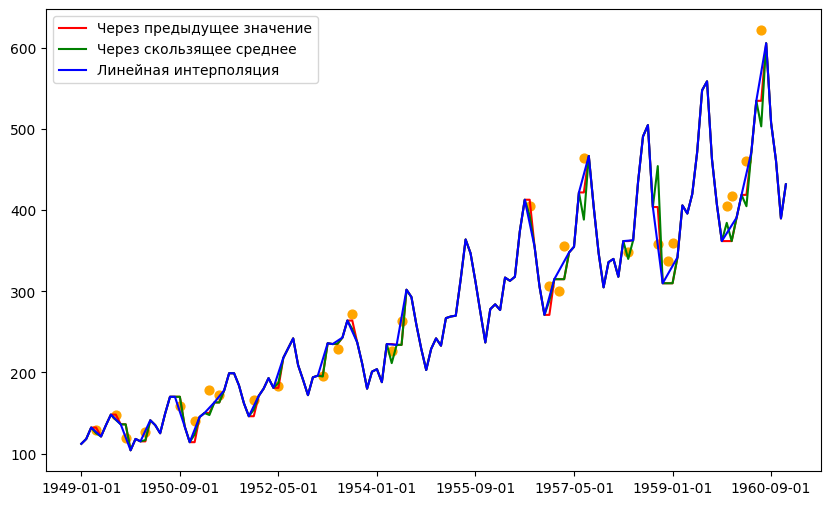

In [196]:
plt.figure(figsize=(10,6))

plt.scatter(a['Month'], a['missing'], color='orange', s=40, marker='o')
plt.xticks(a1['Month'].to_list()[::20])
plt.plot(a1['Month'],a1['target'],'-r',label = "Через предыдущее значение")
plt.plot(a2['Month'],a2['target'],'-g',label = "Через скользящее среднее")
plt.plot(a3['Month'],a3['target'],'-b',label = "Линейная интерполяция")
plt.legend()

([<matplotlib.axis.XTick at 0x165cb95d0>,
 [Text(0.0, 0, '1949-01-01'),
  Text(20.0, 0, '1950-09-01'),
  Text(40.0, 0, '1952-05-01'),
  Text(60.0, 0, '1954-01-01'),
  Text(80.0, 0, '1955-09-01'),
  Text(100.0, 0, '1957-05-01'),
  Text(120.0, 0, '1959-01-01'),
  Text(140.0, 0, '1960-09-01')])

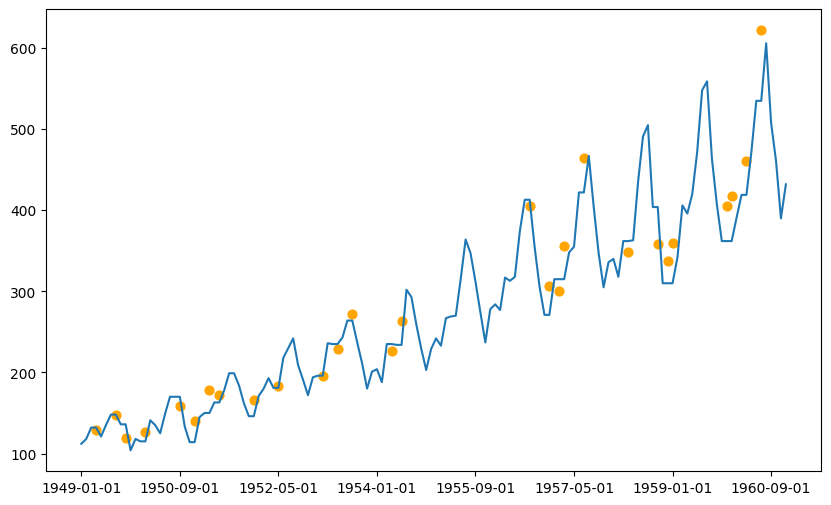

In [199]:
plt.figure(figsize=(10,6))
plt.plot(a1['Month'],a1['target'])
plt.scatter(a['Month'], a['missing'], color='orange', s=40, marker='o')
plt.xticks(a1['Month'].to_list()[::20])

([<matplotlib.axis.XTick at 0x165c3e710>,
 [Text(0.0, 0, '1949-01-01'),
  Text(20.0, 0, '1950-09-01'),
  Text(40.0, 0, '1952-05-01'),
  Text(60.0, 0, '1954-01-01'),
  Text(80.0, 0, '1955-09-01'),
  Text(100.0, 0, '1957-05-01'),
  Text(120.0, 0, '1959-01-01'),
  Text(140.0, 0, '1960-09-01')])

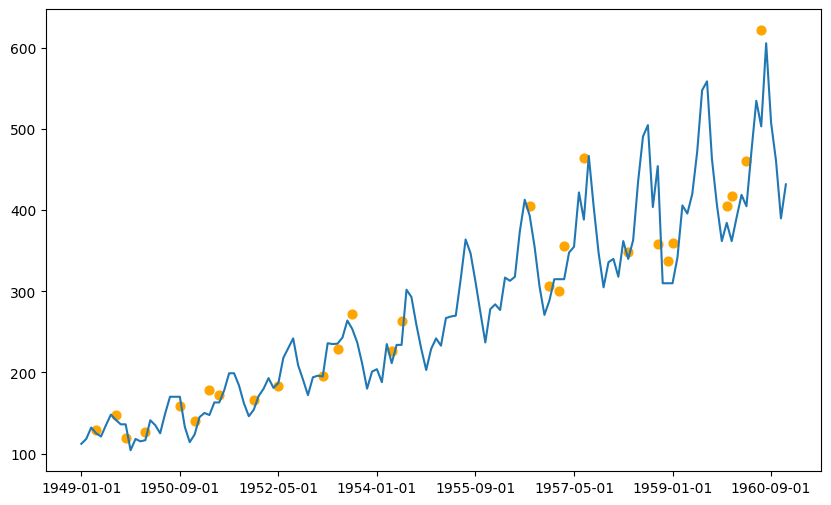

In [198]:
plt.figure(figsize=(10,6))
plt.plot(a2['Month'],a2['target'])
plt.scatter(a['Month'], a['missing'], color='orange', s=40, marker='o')
plt.xticks(a2['Month'].to_list()[::20])

([<matplotlib.axis.XTick at 0x165bbf310>,
 [Text(0.0, 0, '1949-01-01'),
  Text(20.0, 0, '1950-09-01'),
  Text(40.0, 0, '1952-05-01'),
  Text(60.0, 0, '1954-01-01'),
  Text(80.0, 0, '1955-09-01'),
  Text(100.0, 0, '1957-05-01'),
  Text(120.0, 0, '1959-01-01'),
  Text(140.0, 0, '1960-09-01')])

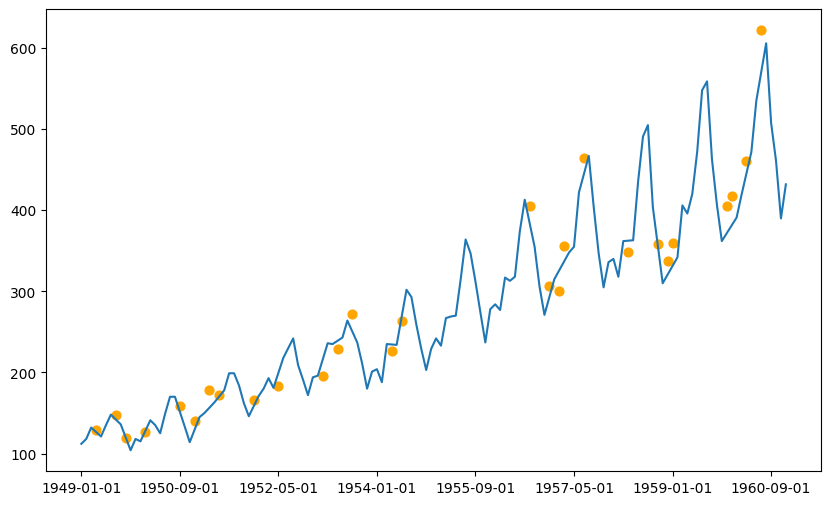

In [197]:
plt.figure(figsize=(10,6))
plt.plot(a3['Month'],a3['target'])
plt.scatter(a['Month'], a['missing'], color='orange', s=40, marker='o')
plt.xticks(a3['Month'].to_list()[::20])

In [210]:
def f(x):
    if pd.isna(x.target):
        x.target = x.target2
    return x

b = a.join(a.target.shift(1), rsuffix="1").join(a.target.shift(-1), rsuffix="m1").apply(lambda x:(x.target1 + x.targetm1) / (x.target * 2), axis=1)

a["prevYearAvg"] = b.shift(12)






In [216]:
si = list(map(lambda x: None if pd.isna(x) else x, a.target.to_list()))

In [218]:
s = si[0]
d = 0.8
for i in range(1, len(si)):
    if si[i] is not None:
        s = d * s + (1-d) * si[i]
    else:
        si[i] = s
        s = d * s + (1-d) * si[i]


In [220]:
a.target = si

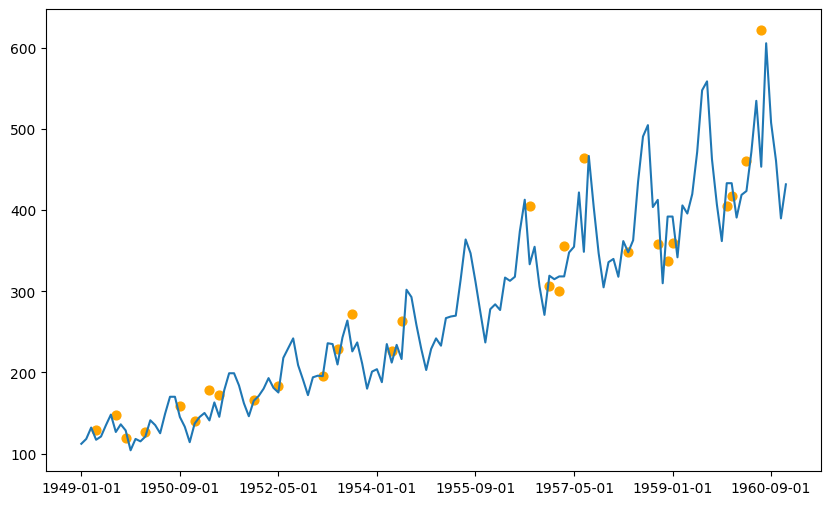

In [224]:
plt.figure(figsize=(10,6))
plt.plot(a['Month'],a['target'])
plt.scatter(a['Month'], a['missing'], color='orange', s=40, marker='o')
plt.xticks(a['Month'].to_list()[::20])
pass

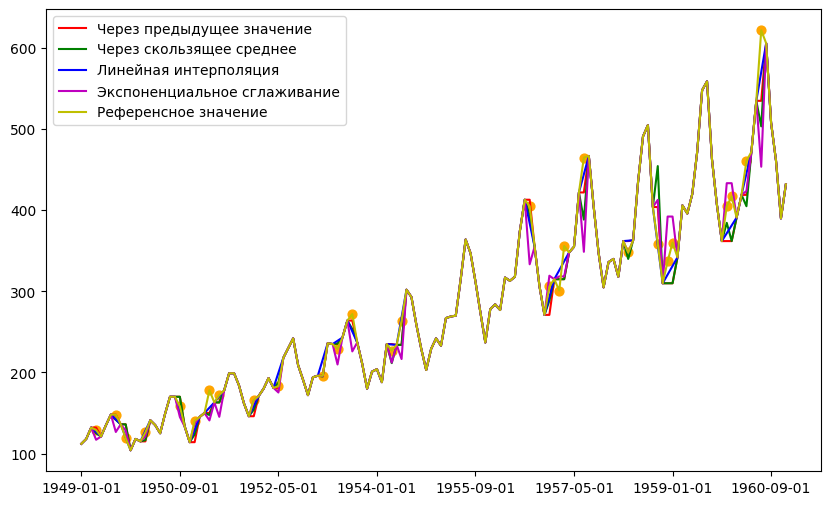

In [227]:
plt.figure(figsize=(10,6))

plt.scatter(a['Month'], a['missing'], color='orange', s=40, marker='o')
plt.xticks(a1['Month'].to_list()[::20])
plt.plot(a1['Month'],a1['target'],'-r',label = "Через предыдущее значение")
plt.plot(a2['Month'],a2['target'],'-g',label = "Через скользящее среднее")
plt.plot(a3['Month'],a3['target'],'-b',label = "Линейная интерполяция")
plt.plot(a['Month'],a['target'],'-m',label = "Экспоненциальное сглаживание")
plt.plot(a['Month'],a['reference'],'-y',label = "Референсное значение")
plt.legend()

<AxesSubplot: xlabel='Month'>

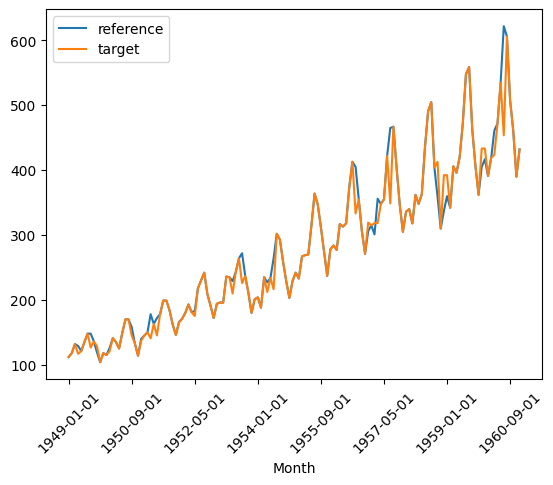

In [229]:
a.set_index('Month').loc[:,['reference','target']].plot(rot=45)